In [264]:
import numpy as np
import pandas as pd
import matplotlib as plot
import matplotlib.pyplot as plt
from sklearn import *

In [229]:
data = pd.read_csv('weather.csv', sep=',')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [231]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [232]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data = data.set_index('date')
data = data.sort_index()
data.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


{'whiskers': [<matplotlib.lines.Line2D at 0x1b933997070>,
 'caps': [<matplotlib.lines.Line2D at 0x1b9339975b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b933996ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b933997af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b933997d90>],
 'means': []}

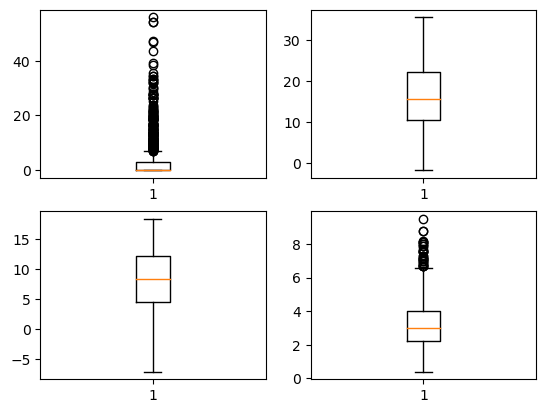

In [233]:
plt.subplot(2,2,1)
plt.boxplot(data['precipitation'])
plt.subplot(2,2,2)
plt.boxplot(data['temp_max'])
plt.subplot(2,2,3)
plt.boxplot(data['temp_min'])
plt.subplot(2,2,4)
plt.boxplot(data['wind'])

In [234]:
data = data.asfreq('MS')
print(f'Number of rows with missing values: {data.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


In [235]:
data['weather'].value_counts()

sun        24
rain       20
drizzle     2
fog         2
Name: weather, dtype: int64

<Axes: xlabel='date'>

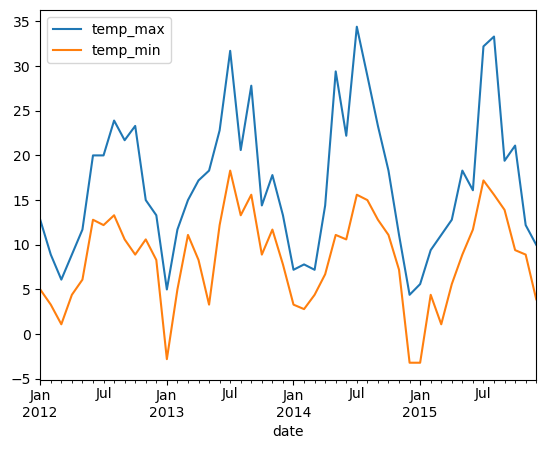

In [236]:
data[['temp_max','temp_min']].plot()

<Axes: xlabel='date'>

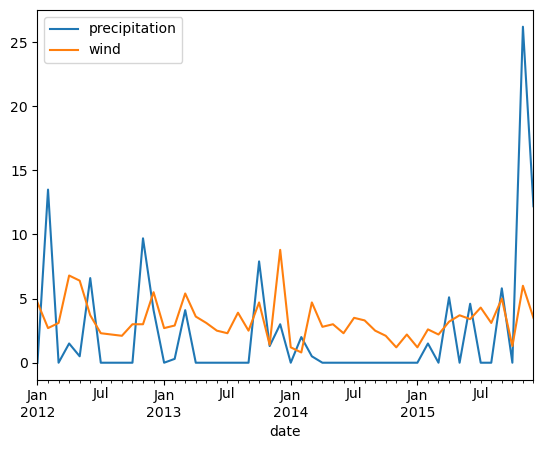

In [237]:
data[['precipitation','wind']].plot()

In [238]:
data.index.year.value_counts().sort_index()

2012    12
2013    12
2014    12
2015    12
Name: date, dtype: int64

In [239]:
data.groupby(data.index.year).sum()

,precipitation,temp_max,temp_min,wind
date,,,,
2012,35.9,185.6,96.6,45.5
2013,16.6,215.6,112.7,43.8
2014,2.5,208.6,97.4,29.6
2015,55.4,201.5,97.4,39.5


In [240]:
data['target'] = data.shift(-1)['temp_max']
data = data.iloc[:-1,:].copy()
data

,precipitation,temp_max,temp_min,wind,weather,target
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,8.9
2012-02-01,13.5,8.9,3.3,2.7,rain,6.1
2012-03-01,0.0,6.1,1.1,3.1,sun,8.9
2012-04-01,1.5,8.9,4.4,6.8,rain,11.7
2012-05-01,0.5,11.7,6.1,6.4,rain,20.0
2012-06-01,6.6,20.0,12.8,3.7,rain,20.0
2012-07-01,0.0,20.0,12.2,2.3,rain,23.9
2012-08-01,0.0,23.9,13.3,2.2,drizzle,21.7
2012-09-01,0.0,21.7,10.6,2.1,sun,23.3


In [241]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha = .1)
predictors = ['precipitation', 'temp_max','temp_min']
train = data.loc[:"2014-12-31"]
test = data.loc["2014-12-31":]


In [242]:
reg.fit(train[predictors], train['target'])

Ridge(alpha=0.1)

In [243]:
prediction = reg.predict(test[predictors])

In [244]:
from sklearn.metrics import mean_absolute_error

In [245]:
mean_absolute_error(test['target'], prediction)

5.403809844647318

In [246]:
combined = pd.concat([test['target'],pd.Series(prediction, index = test.index)], axis = 1)
combined.columns = ['actual', 'prediction']
combined

,actual,prediction
date,,
2015-01-01,9.4,10.305453
2015-02-01,11.1,11.889147
2015-03-01,12.8,13.767924
2015-04-01,18.3,12.890839
2015-05-01,16.1,18.162116
2015-06-01,32.2,14.914836
2015-07-01,33.3,27.076507
2015-08-01,19.4,27.925941
2015-09-01,21.1,16.605971


<Axes: xlabel='date'>

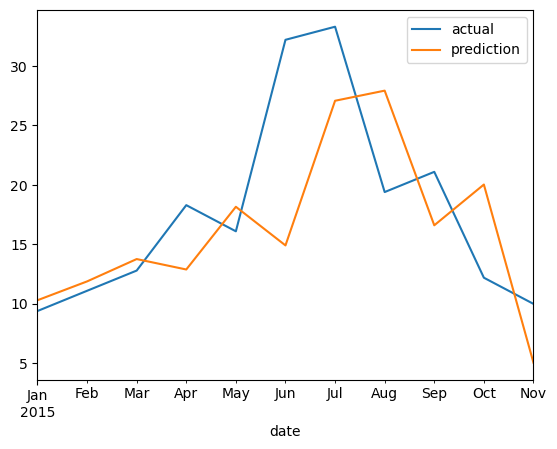

In [247]:
combined.plot()

In [248]:
reg.coef_

array([-0.34215888,  0.67941748, -0.06379662])

In [249]:
def prediction_model(predictors, data,reg):
    train = data.loc[:"2014-12-31"]
    test = data.loc["2014-12-31":]
    reg.fit(train[predictors], train['target'])
    prediction = reg.predict(test[predictors])
    error = mean_absolute_error(test['target'], prediction)
    combined = pd.concat([test['target'],pd.Series(prediction, index = test.index)], axis = 1)
    combined.columns = ['actual', 'prediction']
    return error, combined

In [250]:
data['month_max'] = data['temp_max'].rolling(30).mean()
data = data.iloc[30:,:].copy()
data

,precipitation,temp_max,temp_min,wind,weather,target,month_max
date,,,,,,,
2014-07-01,0.0,34.4,15.6,3.5,sun,28.9,17.033333
2014-08-01,0.0,28.9,15.0,3.3,sun,23.3,17.700000
2014-09-01,0.0,23.3,12.8,2.5,sun,18.3,18.273333
2014-10-01,0.0,18.3,11.1,2.1,sun,11.1,18.586667
2014-11-01,0.0,11.1,7.2,1.2,fog,4.4,18.566667
2014-12-01,0.0,4.4,-3.2,2.2,sun,5.6,18.046667
2015-01-01,0.0,5.6,-3.2,1.2,sun,9.4,17.566667
2015-02-01,1.5,9.4,4.4,2.6,rain,11.1,17.083333
2015-03-01,0.0,11.1,1.1,2.2,sun,12.8,16.730000


In [251]:
data['month_day_max']= data['month_max']/data['temp_max']
data['max_min']= data['temp_max']/data['temp_min']
data

,precipitation,temp_max,temp_min,wind,weather,target,month_max,month_day_max,max_min
date,,,,,,,,,
2014-07-01,0.0,34.4,15.6,3.5,sun,28.9,17.033333,0.495155,2.205128
2014-08-01,0.0,28.9,15.0,3.3,sun,23.3,17.700000,0.612457,1.926667
2014-09-01,0.0,23.3,12.8,2.5,sun,18.3,18.273333,0.784263,1.820312
2014-10-01,0.0,18.3,11.1,2.1,sun,11.1,18.586667,1.015665,1.648649
2014-11-01,0.0,11.1,7.2,1.2,fog,4.4,18.566667,1.672673,1.541667
2014-12-01,0.0,4.4,-3.2,2.2,sun,5.6,18.046667,4.101515,-1.375000
2015-01-01,0.0,5.6,-3.2,1.2,sun,9.4,17.566667,3.136905,-1.750000
2015-02-01,1.5,9.4,4.4,2.6,rain,11.1,17.083333,1.817376,2.136364
2015-03-01,0.0,11.1,1.1,2.2,sun,12.8,16.730000,1.507207,10.090909


In [252]:
preditors = ['precipitation','temp_max','temp_min', 'month_max', 'month_day_max','max_min']

In [253]:
error, combined = prediction_model(predictors, data,reg)

In [254]:
error

7.580419298920779

<Axes: xlabel='date'>

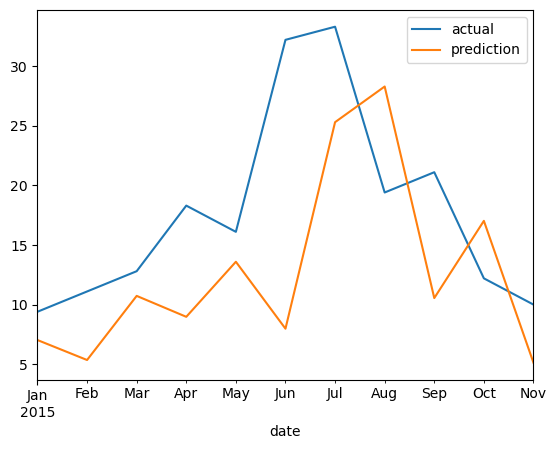

In [255]:
combined.plot()

In [256]:
df = pd.read_csv('weather.csv', sep=',')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d' )
df = df.set_index('date')
df = df.sort_index()
dataa = df.drop(['weather'], axis = 1)
dataa

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-01,0.0,12.8,5.0,4.7
2012-01-02,10.9,10.6,2.8,4.5
2012-01-03,0.8,11.7,7.2,2.3
2012-01-04,20.3,12.2,5.6,4.7
2012-01-05,1.3,8.9,2.8,6.1
...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9
2015-12-28,1.5,5.0,1.7,1.3
2015-12-29,0.0,7.2,0.6,2.6


In [257]:

def random_centroids(dataa, k ):
    centroids = []
    for i in range(k):
        centroid = dataa.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis = 1)

centroids = random_centroids(dataa, 5)
centroids

,0,1,2,3,4
precipitation,0.0,7.6,17.3,0.0,0.0
temp_max,18.9,12.8,6.7,5.0,29.4
temp_min,4.4,3.9,11.1,2.8,12.2
wind,2.4,1.7,4.5,4.6,2.6


In [258]:
def get_labels(dataa, centroids): #فاصله تا مرکز
    distances = centroids.apply(lambda x: np.sqrt(((data-x)**2).sum(axis=1)))
    return distances.idxmin(axis = 1)

distances

,0,1,2,3,4
date,,,,,
2014-07-01,19.324106,20.123111,26.535235,13.894215,34.157526
2014-08-01,11.772536,13.682203,21.994051,16.444085,27.577847
2014-09-01,5.847949,8.255000,18.519310,20.638633,20.792686
2014-10-01,8.620872,10.025089,17.924983,28.076861,15.601380
2014-11-01,17.899800,17.475379,21.790710,36.831761,12.597769
2014-12-01,26.925408,23.005765,25.449618,41.944398,10.379353
2015-01-01,24.742525,20.386280,23.694762,38.747458,8.074490
2015-02-01,16.118925,14.149811,20.998305,32.914599,8.411850
2015-03-01,19.119433,15.133955,20.237111,29.818276,9.998771


In [259]:
labels = get_labels(dataa, centroids)
labels.value_counts()

4    5
0    5
3    5
1    1
2    1
dtype: int64

In [260]:
def new_centroids(dataa,labels,k):
    return dataa.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T 
#مرکز های جدید براساس میانگین فاصله ی نقاط در هر خوشه

In [261]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [262]:
def plot_clusters(dataa,labels,centroids, iteration):
    pca = PCA(n_components = 2) 
    dataa_2d = pca.fit_transform(dataa)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait = True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=dataa_2d[:,0], y=dataa_2d[:,1])
    plt.scatter(x= centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

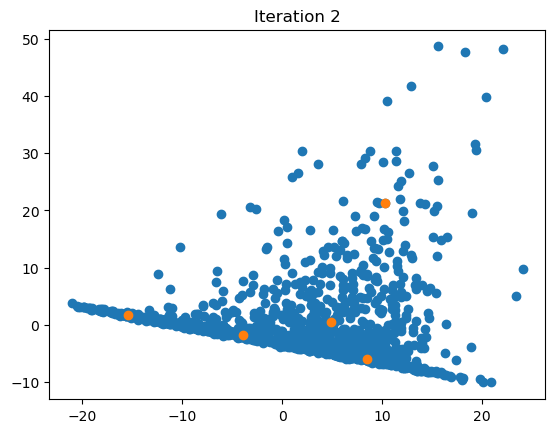

In [263]:
max_iterations = 1462
k=4
centroids = random_centroids(dataa,k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids =centroids
    lebels = get_labels(dataa,centroids)
    centroids = new_centroids(dataa,labels,k)
    plot_clusters(dataa, labels,centroids, iteration )
    iteration += 1